In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import os
import json

style.use('ggplot')

In [4]:
# input_list = ['Australia', 'United Kingdom', 'Germany', 'Netherlands', 'United States', 'China']  # Country

input_list = ['Europe', 'Americas', 'Asia', 'Oceania', 'Africa']  # Region

# input_list = ['Western Europe', 'Australia and New Zealand', 'Northern America', 
#               'Northern Europe', 'Eastern Asia']  #subregion

# input_list = ['English', 'Dutch', 'German', 'Chinese']  # language

on = 'region' # can be Country, region, subregion or language 

In [5]:
dirname = os.getcwd()
dirname = dirname + '/Data/'

In [346]:
overlap = pd.read_csv(dirname + 'overlap2.csv')
grid = pd.read_csv(dirname + 'grid.csv')
with open(dirname + 'countries.json') as f:
    json_data = json.load(f)

In [347]:
def add_region(df):
    df['region'] = None
    df['subregion'] = None
    df['language'] = None
    for j, row in df.iterrows():
        for i in json_data:
            if i['name']['common'] == row['Country']:
                df.loc[j, 'region'] = i['region']
                df.loc[j, 'subregion'] = i['subregion']
                df.loc[j, 'language'] = list(i['languages'].values())[0]

In [348]:
def create_constructs(df_ARWU, year):
    
    df_ARWU['Reputation_ARWU'] = (df_ARWU['Alumni'] + df_ARWU['Award']) / 2
    df_ARWU['Publication_ARWU'] = (df_ARWU['HiCi'] + df_ARWU['NS'] + df_ARWU['PUB']) / 3
    df_ARWU = df_ARWU[['GRID_ID', "WorldRank", 'Country', 'region', 'subregion', 'language', 'Reputation_ARWU', 'Publication_ARWU']]
    df_ARWU['year'] = int(year)
    df_ARWU = df_ARWU[['GRID_ID', "WorldRank", 'year', 'Country', 'region', 'subregion', 'language', 'Reputation_ARWU', 'Publication_ARWU']]
    df_ARWU.columns = ['GRID_ID', "WorldRank", 'year', 'Country', 'region', 'subregion', 'language', 'Reputation_ARWU', 'Publication_ARWU']
    
    return df_ARWU

In [349]:
df_ARWU2018 = pd.read_csv(dirname + 'ARWU/ARWURanking_2018_grid.csv')
df_ARWU2017 = pd.read_csv(dirname + 'ARWU/ARWURanking_2017_grid.csv')
df_ARWU2016 = pd.read_csv(dirname + 'ARWU/ARWURanking_2016_grid.csv')
df_ARWU2015 = pd.read_csv(dirname + 'ARWU/ARWURanking_2015_grid.csv')
df_ARWU2014 = pd.read_csv(dirname + 'ARWU/ARWURanking_2014_grid.csv')
df_ARWU2013 = pd.read_csv(dirname + 'ARWU/ARWURanking_2013_grid.csv')
df_ARWU2012 = pd.read_csv(dirname + 'ARWU/ARWURanking_2012_grid.csv')

ARWU_DATA = ["GRID_ID", 'WorldRank', "Alumni","Award","HiCi", "NS", "PUB"]

df_ARWU2012 = df_ARWU2012[ARWU_DATA].dropna()
df_ARWU2013 = df_ARWU2013[ARWU_DATA].dropna()
df_ARWU2014 = df_ARWU2014[ARWU_DATA].dropna()
df_ARWU2015 = df_ARWU2015[ARWU_DATA].dropna()
df_ARWU2016 = df_ARWU2016[ARWU_DATA].dropna()
df_ARWU2017 = df_ARWU2017[ARWU_DATA].dropna()
df_ARWU2018 = df_ARWU2018[ARWU_DATA].dropna()

df_ARWU2012['WorldRank'] = df_ARWU2012['WorldRank'].astype(str).str[:3].astype(int)
df_ARWU2013['WorldRank'] = df_ARWU2013['WorldRank'].astype(str).str[:3].astype(int)
df_ARWU2014['WorldRank'] = df_ARWU2014['WorldRank'].astype(str).str[:3].astype(int)
df_ARWU2015['WorldRank'] = df_ARWU2015['WorldRank'].astype(str).str[:3].astype(int)
df_ARWU2016['WorldRank'] = df_ARWU2016['WorldRank'].astype(str).str[:3].astype(int)
df_ARWU2017['WorldRank'] = df_ARWU2017['WorldRank'].astype(str).str[:3].astype(int)
df_ARWU2018['WorldRank'] = df_ARWU2018['WorldRank'].astype(str).str[:3].astype(int)

df_ARWU2012 = pd.merge(df_ARWU2012, overlap, on='GRID_ID', how='inner')
df_ARWU2013 = pd.merge(df_ARWU2013, overlap, on='GRID_ID', how='inner')
df_ARWU2014 = pd.merge(df_ARWU2014, overlap, on='GRID_ID', how='inner')
df_ARWU2015 = pd.merge(df_ARWU2015, overlap, on='GRID_ID', how='inner')
df_ARWU2016 = pd.merge(df_ARWU2016, overlap, on='GRID_ID', how='inner')
df_ARWU2017 = pd.merge(df_ARWU2017, overlap, on='GRID_ID', how='inner')
df_ARWU2018 = pd.merge(df_ARWU2018, overlap, on='GRID_ID', how='inner')

df_ARWU2012 = pd.merge(df_ARWU2012, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_ARWU2013 = pd.merge(df_ARWU2013, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_ARWU2014 = pd.merge(df_ARWU2014, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_ARWU2015 = pd.merge(df_ARWU2015, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_ARWU2016 = pd.merge(df_ARWU2016, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_ARWU2017 = pd.merge(df_ARWU2017, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_ARWU2018 = pd.merge(df_ARWU2018, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')

add_region(df_ARWU2018)
add_region(df_ARWU2017)
add_region(df_ARWU2016)
add_region(df_ARWU2015)
add_region(df_ARWU2014)
add_region(df_ARWU2013)
add_region(df_ARWU2012)

df_ARWU2018 = create_constructs(df_ARWU2018, '2018')
df_ARWU2017 = create_constructs(df_ARWU2017, '2017')
df_ARWU2016 = create_constructs(df_ARWU2016, '2016')
df_ARWU2015 = create_constructs(df_ARWU2015, '2015')
df_ARWU2014 = create_constructs(df_ARWU2014, '2014')
df_ARWU2013 = create_constructs(df_ARWU2013, '2013')
df_ARWU2012 = create_constructs(df_ARWU2012, '2012')

/Users/Friso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [350]:
def create_constructs_THE(df_THE, year):
    
    df_THE['Reputation_THE'] = (df_THE['Teaching'] + df_THE['Rechearch']) / 2
    df_THE['Publication_THE'] = df_THE['Citations']
    df_THE = df_THE[['GRID_ID', 'rank', 'Country', 'region', 'subregion', 'language', 'Reputation_THE', 'Publication_THE']]
    df_THE['year'] = int(year)
    df_THE = df_THE[['GRID_ID', 'rank', 'year', 'Country', 'region', 'subregion', 'language', 'Reputation_THE', 'Publication_THE']]
    df_THE.columns = ['GRID_ID', 'rank', 'year', 'Country', 'region', 'subregion', 'language', 'Reputation_THE', 'Publication_THE']
    
    return df_THE

In [351]:
df_THE2012 = pd.read_csv(dirname + 'THE/THERanking2013__grid.csv')
df_THE2013 = pd.read_csv(dirname + 'THE/THERanking2014__grid.csv')
df_THE2014 = pd.read_csv(dirname + 'THE/THERanking2015__grid.csv')
df_THE2015 = pd.read_csv(dirname + 'THE/THERanking2016__grid.csv')
df_THE2016 = pd.read_csv(dirname + 'THE/THERanking2017__grid.csv')
df_THE2017 = pd.read_csv(dirname + 'THE/THERanking2018__grid.csv')
df_THE2018 = pd.read_csv(dirname + 'THE/THERanking2019__grid.csv')

THE_DATA = ["GRID_ID", 'rank', 'Location', "Teaching","Rechearch","Citations", "Industry_Income", "Internationals_Outlook"]

df_THE2012['rank'] = df_THE2012['rank'].str.replace('=', '').str.replace('>', '').str[:3].astype(int)
df_THE2013['rank'] = df_THE2013['rank'].str.replace('=', '').str.replace('>', '').str[:3].astype(int)
df_THE2014['rank'] = df_THE2014['rank'].str.replace('=', '').str.replace('>', '').str[:3].astype(int)
df_THE2015['rank'] = df_THE2015['rank'].str.replace('=', '').str.replace('>', '').str[:3].astype(int)
df_THE2016['rank'] = df_THE2016['rank'].str.replace('=', '').str.replace('>', '').str[:3].astype(int)
df_THE2017['rank'] = df_THE2017['rank'].str.replace('=', '').str.replace('>', '').str[:3].astype(int)
df_THE2018['rank'] = df_THE2018['rank'].str.replace('=', '').str.replace('>', '').str[:3].astype(int)

df_THE2012 = df_THE2012[THE_DATA].dropna()
df_THE2013 = df_THE2013[THE_DATA].dropna()
df_THE2014 = df_THE2014[THE_DATA].dropna()
df_THE2015 = df_THE2015[THE_DATA].dropna()
df_THE2016 = df_THE2016[THE_DATA].dropna()
df_THE2017 = df_THE2017[THE_DATA].dropna()
df_THE2018 = df_THE2018[THE_DATA].dropna()

df_THE2012 = pd.merge(df_THE2012, overlap, on='GRID_ID', how='inner')
df_THE2013 = pd.merge(df_THE2013, overlap, on='GRID_ID', how='inner')
df_THE2014 = pd.merge(df_THE2014, overlap, on='GRID_ID', how='inner')
df_THE2015 = pd.merge(df_THE2015, overlap, on='GRID_ID', how='inner')
df_THE2016 = pd.merge(df_THE2016, overlap, on='GRID_ID', how='inner')
df_THE2017 = pd.merge(df_THE2017, overlap, on='GRID_ID', how='inner')
df_THE2018 = pd.merge(df_THE2018, overlap, on='GRID_ID', how='inner')

df_THE2012 = pd.merge(df_THE2012, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_THE2013 = pd.merge(df_THE2013, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_THE2014 = pd.merge(df_THE2014, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_THE2015 = pd.merge(df_THE2015, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_THE2016 = pd.merge(df_THE2016, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_THE2017 = pd.merge(df_THE2017, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_THE2018 = pd.merge(df_THE2018, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')

add_region(df_THE2012)
add_region(df_THE2013)
add_region(df_THE2014)
add_region(df_THE2015)
add_region(df_THE2016)
add_region(df_THE2017)
add_region(df_THE2018)

df_THE2018 = create_constructs_THE(df_THE2018, '2018')
df_THE2017 = create_constructs_THE(df_THE2017, '2017')
df_THE2016 = create_constructs_THE(df_THE2016, '2016')
df_THE2015 = create_constructs_THE(df_THE2015, '2015')
df_THE2014 = create_constructs_THE(df_THE2014, '2014')
df_THE2013 = create_constructs_THE(df_THE2013, '2013')
df_THE2012 = create_constructs_THE(df_THE2012, '2012')

/Users/Friso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [352]:
def create_constructs_QS(df_QS, year):    
    df_QS['Reputation_QS'] = (df_QS['Academic_reputation'] + df_QS['Employer_reputation']) / 2
    df_QS['Publication_QS'] = df_QS['Citations']
    df_QS = df_QS[['GRID_ID', 'Rank', 'Country', 'region', 'subregion', 'language', 'Reputation_QS', 'Publication_QS']]
    df_QS['year'] = int(year)
    df_QS = df_QS[['GRID_ID', 'Rank', 'year', 'Country', 'region', 'subregion', 'language', 'Reputation_QS', 'Publication_QS']]
    df_QS.columns = ['GRID_ID', 'Rank', 'year', 'Country', 'region', 'subregion', 'language', 'Reputation_QS', 'Publication_QS']

    return df_QS

In [353]:
df_QS2012 = pd.read_csv(dirname + 'QS/qs2013_grid.csv')
df_QS2013 = pd.read_csv(dirname + 'QS/qs2014_grid.csv')
df_QS2014 = pd.read_csv(dirname + 'QS/qs2015_grid.csv')
df_QS2015 = pd.read_csv(dirname + 'QS/qs2016_grid.csv')
df_QS2016 = pd.read_csv(dirname + 'QS/qs2017_grid.csv')
df_QS2017 = pd.read_csv(dirname + 'QS/qs2018_grid.csv')
df_QS2018 = pd.read_csv(dirname + 'QS/qs2019_grid.csv')

QS_DATA = ["GRID_ID", 'Rank', 'location', "Academic_reputation","Employer_reputation","Faculty_Student", "International_Faculty", 
           "International_Students", "Citations"]

df_QS2018 = df_QS2018.replace(0, np.nan)
df_QS2017 = df_QS2017.replace(0, np.nan)
df_QS2016 = df_QS2016.replace(0, np.nan)
df_QS2015 = df_QS2015.replace(0, np.nan)
df_QS2014 = df_QS2014.replace(0, np.nan)
df_QS2013 = df_QS2013.replace(0, np.nan)
df_QS2012 = df_QS2012.replace(0, np.nan)

df_QS2018 = df_QS2018[QS_DATA].dropna()
df_QS2017 = df_QS2017[QS_DATA].dropna()
df_QS2016 = df_QS2016[QS_DATA].dropna()
df_QS2015 = df_QS2015[QS_DATA].dropna()
df_QS2014 = df_QS2014[QS_DATA].dropna()
df_QS2013 = df_QS2013[QS_DATA].dropna()
df_QS2012 = df_QS2012[QS_DATA].dropna()

df_QS2018['Rank'] = df_QS2018['Rank'].str.replace('=', '').str[:3].astype(int)
df_QS2017['Rank'] = df_QS2017['Rank'].str.replace('=', '').str[:3].astype(int)
df_QS2016['Rank'] = df_QS2016['Rank'].str.replace('=', '').str[:3].astype(int)
df_QS2015['Rank'] = df_QS2015['Rank'].str.replace('=', '').str[:3].astype(int)
df_QS2014['Rank'] = df_QS2014['Rank'].str.replace('=', '').str[:3].astype(int)
df_QS2013['Rank'] = df_QS2013['Rank'].str.replace('=', '').str[:3].astype(int)
df_QS2012['Rank'] = df_QS2012['Rank'].str.replace('=', '').str[:3].astype(int)

df_QS2018 = pd.merge(df_QS2018, overlap, on='GRID_ID', how='inner')
df_QS2017 = pd.merge(df_QS2017, overlap, on='GRID_ID', how='inner')
df_QS2016 = pd.merge(df_QS2016, overlap, on='GRID_ID', how='inner')
df_QS2015 = pd.merge(df_QS2015, overlap, on='GRID_ID', how='inner')
df_QS2014 = pd.merge(df_QS2014, overlap, on='GRID_ID', how='inner')
df_QS2013 = pd.merge(df_QS2013, overlap, on='GRID_ID', how='inner')
df_QS2012 = pd.merge(df_QS2012, overlap, on='GRID_ID', how='inner')

df_QS2018 = pd.merge(df_QS2018, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_QS2017 = pd.merge(df_QS2017, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_QS2016 = pd.merge(df_QS2016, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_QS2015 = pd.merge(df_QS2015, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_QS2014 = pd.merge(df_QS2014, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_QS2013 = pd.merge(df_QS2013, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')
df_QS2012 = pd.merge(df_QS2012, grid[['ID','Country']], left_on='GRID_ID', right_on='ID', how='inner')

add_region(df_QS2018)
add_region(df_QS2017)
add_region(df_QS2016)
add_region(df_QS2015)
add_region(df_QS2014)
add_region(df_QS2013)
add_region(df_QS2012)

df_QS2018 = create_constructs_QS(df_QS2018, '2018')
df_QS2017 = create_constructs_QS(df_QS2017, '2017')
df_QS2016 = create_constructs_QS(df_QS2016, '2016')
df_QS2015 = create_constructs_QS(df_QS2015, '2015')
df_QS2014 = create_constructs_QS(df_QS2014, '2014')
df_QS2013 = create_constructs_QS(df_QS2013, '2013')
df_QS2012 = create_constructs_QS(df_QS2012, '2012')

/Users/Friso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [354]:
def group(df, on):
    df = df.groupby(on, as_index=False).head()
    df = df.groupby(on, as_index=False).mean()
    
    return df

In [355]:
df_ARWU = group(df_ARWU2018, on)
listARWU = [df_ARWU2017, df_ARWU2016, df_ARWU2015, df_ARWU2014, df_ARWU2013, df_ARWU2012]
for i in listARWU:
    df_ARWU = df_ARWU.append(group(i, on))

df_THE = group(df_THE2018, on)
listTHE = [df_THE2017, df_THE2016, df_THE2015, df_THE2014, df_THE2013, df_THE2012]
for i in listTHE:
    df_THE = df_THE.append(group(i, on))

df_QS = group(df_QS2018, on)
listQS = [df_QS2017, df_QS2016, df_QS2015, df_QS2014, df_QS2013, df_QS2012]
for i in listQS:
    df_QS = df_QS.append(group(i, on))

In [356]:
def create_uni_df(ARWU, THE, QS, INPUT, on):
    ARWU = ARWU[ARWU[on] == INPUT]
    THE = THE[THE[on] == INPUT]
    QS = QS[QS[on] == INPUT]

    return ARWU, THE, QS

In [357]:
def add_arrow(line, position=None, direction='right', size=20, color=None):
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    for i in range(len(xdata) - 1):
        position = xdata[i]
        start_ind = np.argmin(np.absolute(xdata - position))
        if direction == 'right':
            end_ind = start_ind + 1
        else:
            end_ind = start_ind - 1

        line.axes.annotate('',
            xytext=(xdata[start_ind], ydata[start_ind]),
            xy=(xdata[end_ind], ydata[end_ind]),
            arrowprops=dict(arrowstyle="-|>", color=color),
            size=size
        )

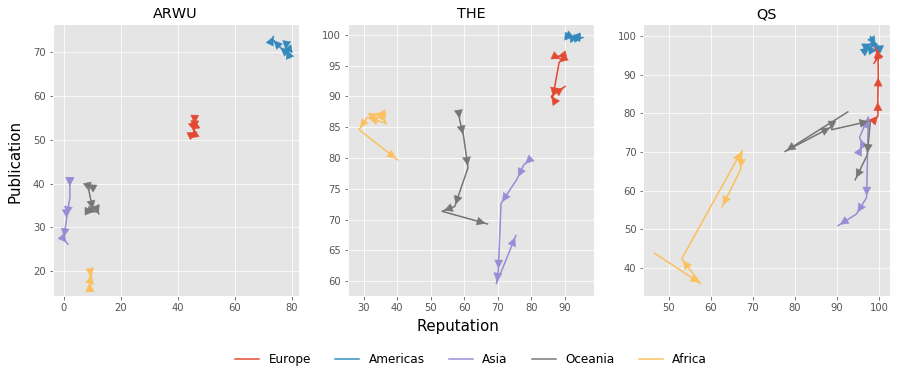

In [358]:
fig, (ax1, ax2 ,ax3) = plt.subplots(1, 3, figsize=(15,5))

for i in input_list:
    ARWU_temp, THE_temp, QS_temp = create_uni_df(df_ARWU, df_THE, df_QS, i, on)
    
    line = ax1.plot(ARWU_temp['Reputation_ARWU'], ARWU_temp['Publication_ARWU'])[0]
    add_arrow(line)
    line = ax2.plot(THE_temp['Reputation_THE'], THE_temp['Publication_THE'])[0]
    add_arrow(line)
    line = ax3.plot(QS_temp['Reputation_QS'], QS_temp['Publication_QS'])[0]
    add_arrow(line)
    
ax1.set_title('ARWU')
ax2.set_title('THE')
ax3.set_title('QS')
fig.text(0.5, 0.04, 'Reputation', ha='center', va='center', fontsize=15)
fig.text(0.09, 0.5, 'Publication', ha='center', va='center', rotation='vertical', fontsize=15)
ax2.legend(input_list, loc='upper center',
           bbox_to_anchor=(0.5, -0.17), ncol=len(input_list), fontsize = 'large', frameon=False)

In [27]:
import requests
from bs4 import BeautifulSoup

df_ARWU2018 = pd.read_csv(dirname + 'ARWU/ARWURanking_2018_grid.csv')

df_ARWU2018['latitude'] = None
df_ARWU2018['longitude'] = None

for i, row in df_ARWU2018.iterrows():
    grid = row['GRID_ID']
    r = requests.get('https://www.grid.ac/institutes/' + grid).text
    soup = BeautifulSoup(r)    
    latitude = soup.find("meta",  itemprop="latitude")
    longitude = soup.find("meta",  itemprop="longitude")
    latitude = latitude["content"] if latitude else None
    longitude = longitude["content"] if longitude else None
    
    df_ARWU2018.loc[i, 'latitude'] = latitude
    df_ARWU2018.loc[i, 'longitude'] = longitude
    

42.377053 -71.116657
37.43 -122.17
52.204454 0.114908
42.35982 -71.09211
37.872162 -122.258572
40.344234 -74.651469
51.7534358 -1.25400973048628
40.807772 -73.962584
34.138577 -118.125494
41.788848 -87.598702
34.072222 -118.444097
42.44851 -76.47862
41.3020932 -72.9306542
47.655537 -122.303531
32.881 -117.238
39.952458 -75.193225
51.5244721122865 -0.133981704711914
39.328889 -76.620278
47.37581 8.546482
38.649033 -90.31085
37.762799 -122.457669
35.713333 139.762222
43.661667 -79.395
51.4986 -0.175478
42.054853 -87.673945
36.0031459157584 -78.9268970489502
42.278306 -83.738224
43.076694 -89.412434
55.679722 12.5725
40.7625 -73.955556
35.905164 -79.046945
40.73 -73.995
55.944895 -3.189284
53.467048 -2.233884
35.026156 135.779792
48.84848 2.343234
44.974195 -93.22776
-37.797115 144.959972
40.007367 -105.265255
30.28614 -97.73942
40.102182 -88.227194
48.697756 2.175969
49.260675 -123.24608
59.348017 18.022285
39.999585 116.325414
34.414228 -119.849119
49.419349 8.670238
48.148056 11.568056

-33.44091 -70.640803
25.037247 121.389539
39.991231 116.350741
29.560259 106.454192
40.8194 -73.95
31.228056 121.4
48.714293 2.211313
-19.871904 -43.966248
-30.032439 -51.219313
-35.024038 138.572615
25.75744 -80.373282
45.772222 126.675
55.909257 -3.319783
30.475255 114.354237
13.021275 77.565769
41.012653 28.963254
50.060833 19.932778
39.197244 -96.587815
22.64752 120.31043
41.146411 -81.341744
34.728056 135.234722
47.262683 11.385333
48.844952 2.339193
33.454 -88.789
55.929444 37.521389
32.043848 118.774762
32.078711 118.771964
32.036006 118.813808
32.207222 118.721667
37.978715 23.782653
24.793611 120.992778
53.277784 -9.06186
41.769696 123.421039
54.843611 83.093611
36.132222 -97.080833
39.999585 116.325414
36.014146 129.323163
39.481653 -0.343808
41.874594 -87.668842
38.636562 -90.233378
31.318333 121.387222
51.427388 -0.174514
-33.933164 18.862044
59.341667 18.057222
49.874995 8.656517
33.588692 -101.864206
29.311201 -94.776068
34.07 134.56
39.947907 -75.158275
35.699663 139.742